# Section \#1: Centralized Algorithms

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import csv
from data_load import load
import scipy.io as io
# Load matplotlib images inline
%matplotlib inline
# These are important for reloading any code you write in external .py files.
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Section \#1.2: Binary Classification 

Please follow our instructions in the same order to solve the binary classification problem.

Please print out the entire results and codes when completed.

In [2]:
"""
Load the dataset from disk and perform preprocessing to prepare it for the linear regression problem.   
"""
train = io.loadmat('mnist_train')
test = io.loadmat('mnist_test')
X_train = train['X_train']
y_train = np.transpose(train['y_train'])
X_test = test['X_test']
y_test = np.transpose(test['y_test'])

print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)


Train data shape:  (5000, 784)
Train target shape:  (5000, 1)
Test data shape:  (500, 784)
Test target shape:  (500, 1)


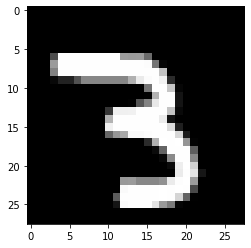

label is 3


In [3]:
# To Visualize a point in the dataset
index = 4000
X = np.array(X_train[index], dtype='uint8')
X = X.reshape((28, 28))
fig = plt.figure()
plt.imshow(X, cmap='gray')
plt.show()
fig.savefig('Sample.pdf')
if y_train[index] == 1:
    label = 3
else:
    label = 2
print('label is', label)

## Train Perceptron
In the following cells, you will build Perceptron Algorithm.

In [19]:
N = X_train.shape[0] # Number of data point
d = X_train.shape[1] # Number of features
loss_hist = []
W = np.zeros((d,1))
# ================================================================ #
# YOUR CODE HERE:
# Implement the perceptron Algorithm and compute the number of misclassified points at each training step
# ================================================================ #
max_iter = N
num_updates = 0
for ii in range(max_iter):
    loss = 0
    for idx in range(N):
        a = np.dot(W[:, 0], X_train[idx, :])
        if np.sign(a) != y_train[idx]:
            W[:, 0] += y_train[idx, 0]*X_train[idx]
            loss += 1
            num_updates += 1
    loss_hist.append(loss)
    if loss == 0:
        print('Terminated after {} iterations.'.format(ii))
        break
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

Terminated after 1402 iterations.


Text(0, 0.5, 'training error')

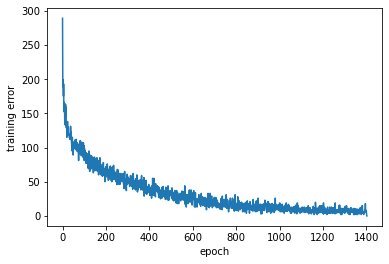

In [20]:
plt.plot(loss_hist)
plt.xlabel('epoch')
plt.ylabel('training error')

In [22]:
print('Final accuracy after {} iterations: {}'.format(max_iter, 1-loss_hist[-1]/N))

Final accuracy after 5000 iterations: 1.0


In [23]:
print('Squared 2-norm of w = {}'.format(np.linalg.norm(W)**2))

Squared 2-norm of w = 177865738033.0


Since the perceptron algorithm reaches 0 loss, it converges and the data is linearly separable.

In [25]:
# Compute the percentage of misclassified points in the test data for perceptron
y_hat = np.sign(X_test@W).astype('int')
acc = np.mean(y_hat == y_test)
print('Acc = {}'.format(acc))

Acc = 0.966


## Train Logistic Regression

In the following cells, you will build a logistic regression. You will implement its loss function, then subsequently train it with gradient descent. 

In [26]:
from Logistic import Logistic

In [27]:
# Complete loss_and_grad function in Logistic.py file and test your results.
N,d = X_train.shape
logistic = Logistic(d=d, reg_param=0)
loss, grad = logistic.loss_and_grad(X_train,y_train)
print('Loss function=',loss)
print(np.linalg.norm(grad,ord=2)**2)

Loss function= 0.6931471805599454
78885.26903007003


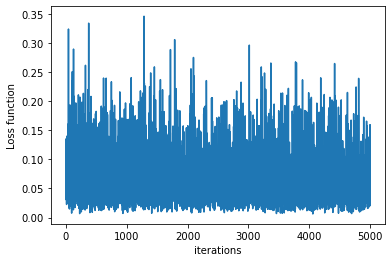

squared 2-norm of w: 0.00039567594085311586
loss: 0.020874384528072554


In [38]:
# Complete train_LR function in Logisitc.py file
loss_history, w = logistic.train_LR(X_train,y_train, eta=1e-6,batch_size=50, num_iters=5000)

fig = plt.figure()
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
fig.savefig('LR_loss_hist.pdf')
print('squared 2-norm of w:', np.linalg.norm(w,ord=2)**2)
print('loss:', loss_history[4999])

Text(0.5, 1.0, 'w')

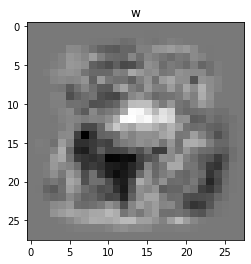

In [39]:
plt.imshow(w[1:].reshape((28, 28)), cmap='gray')
plt.title('w')

In [40]:
# final training accuracy
np.mean(logistic.predict(X_train) == (y_train > 0))

0.9796

In [41]:
# Complete predict function in Logisitc.py file and compute the percentage of misclassified points in the test data
test_acc = np.mean(logistic.predict(X_test) == (y_test > 0))
print('Test error: {:.4}'.format(1-test_acc))

Test error: 0.022


Text(0, 0.5, 'average testing error')

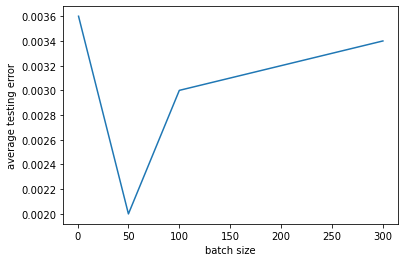

In [48]:
Batch = [1, 50 , 100, 300]
test_err = np.zeros((len(Batch),1))
# ================================================================ #
# YOUR CODE HERE:
# Train the Logistic regression for different batch size Avergae the test error over 10 times
# ================================================================ #
for t in range (0,1):
    for m in range(0,len(Batch)):
        batch_size = Batch[m]
        eta = 1e-5
        num_iters = 8000 // batch_size
        logistic = Logistic(d=d, reg_param=0)
        loss_history, w = logistic.train_LR(X_train,y_train, eta=eta,batch_size=batch_size, num_iters=num_iters)
        
        acc = np.mean(logistic.predict(X_test) == (y_test > 0))
        test_err[m, 0] += 0.1*(1-acc)

plt.plot(Batch, test_err[:, 0])
plt.xlabel('batch size')
plt.ylabel('average testing error')
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

In [36]:
for i in range(4):
    print('Batch size: ', Batch[i], 'Error: ', test_err[i])

Batch size:  1 Error:  [0.0036]
Batch size:  50 Error:  [0.002]
Batch size:  100 Error:  [0.003]
Batch size:  300 Error:  [0.0034]


Testing error is minimized for a batch size of 50.

## Train SVM

In the following cells, you will build SVM. You will implement its loss function, then subsequently train it with mini-batch gradient descent. You will choose the learning rate of gradient descent to optimize its classification performance. Finally, you will get the best regularization parameter.

In [44]:
from SVM import SVM

In [45]:
# Complete loss_and_grad function in SVM.py file and test your results.
N,d = X_train.shape
svm = SVM(d=d, reg_param=0)
loss, grad = svm.loss_and_grad(X_train,y_train)
print('Loss function=',loss)
print(np.linalg.norm(grad,ord=2)**2)

Loss function= 1.0
315541.07612028066


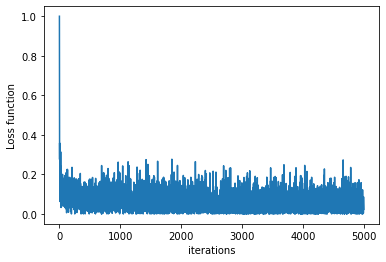

squared 2-norm of w: 0.0002015896931983999
loss: 0.02292531640000014


In [46]:
# Complete train_svm function in SVM.py file 
loss_history, w = svm.train_svm(X_train,y_train, eta=1e-6,batch_size=50, num_iters=5000)
fig = plt.figure()
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
fig.savefig('svm_loss_hist.pdf')
print('squared 2-norm of w:', np.linalg.norm(w,ord=2)**2)
print('loss:', loss_history[4999])

In [47]:
test_acc = np.mean(svm.predict(X_test) == (y_test > 0))
print('Test error: {:.4}'.format(1-test_acc))

Test error: 0.022


Text(0, 0.5, 'average testing error')

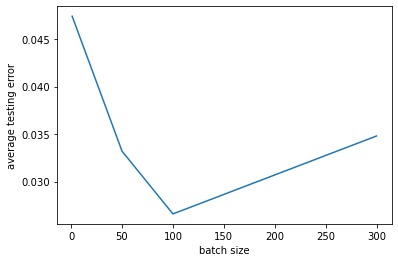

In [49]:
Batch = [1, 50 , 100, 300]
test_err = np.zeros((len(Batch),1))
# ================================================================ #
# YOUR CODE HERE:
# Train the SVM for different batch size Avergae the test error over 10 times
# ================================================================ #
for t in range (0,10):
    for m in range(0,len(Batch)):
        batch_size = Batch[m]
        eta = 1e-5
        num_iters = 8000 // batch_size
        svm = SVM(d=d, reg_param=0)
        loss_history, w = svm.train_svm(X_train,y_train, eta=eta,batch_size=batch_size, num_iters=num_iters)
        
        acc = np.mean(svm.predict(X_test) == (y_test > 0))
        test_err[m, 0] += 0.1*(1-acc)
plt.plot(Batch, test_err[:, 0])
plt.xlabel('batch size')
plt.ylabel('average testing error')
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

In [50]:
for i in range(4):
    print('Batch size: ', Batch[i], 'Error: ', test_err[i])

Batch size:  1 Error:  [0.0474]
Batch size:  50 Error:  [0.0332]
Batch size:  100 Error:  [0.0266]
Batch size:  300 Error:  [0.0348]


Testing error is minimized for a batch size of 100.